In [3]:
import numpy as np
import statsmodels.api as sm
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
import glob

In [4]:
# Define the file paths manually
file_paths = [
        r"C:\Users\Good_\Desktop\Python\Project NHL\Player Stats\2018-2019.csv",
    r"C:\Users\Good_\Desktop\Python\Project NHL\Player Stats\2019-2020.csv",
    r"C:\Users\Good_\Desktop\Python\Project NHL\Player Stats\2020-2021.csv",
    r"C:\Users\Good_\Desktop\Python\Project NHL\Player Stats\2021-2022.csv",
    r"C:\Users\Good_\Desktop\Python\Project NHL\Player Stats\2022-2023.csv",
    r"C:\Users\Good_\Desktop\Python\Project NHL\Player Stats\2023-2024.csv"
]

# List to hold the DataFrames
dfs = []

# Loop through the file paths and read each CSV file
for file in file_paths:
    df = pd.read_csv(file)  # Read the CSV file into a DataFrame
    dfs.append(df)  # Append the DataFrame to the list

# Optionally, concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Filter to keep only rows where 'situation' is 'all'
df = df[df['situation'] == '5on5']
# Convert icetime from seconds to minutes
df['icetime'] = df['icetime'] / 60

In [5]:

# Specify the columns you want to keep
columns_to_keep = [
    'playerId', 'season', 'name', 'team', 'position', 'situation', 'games_played', 'icetime',
    'I_F_shotsOnGoal', 'I_F_shotAttempts', 'I_F_points','I_F_primaryAssists','I_F_secondaryAssists', 'I_F_goals',
    'I_F_savedUnblockedShotAttempts', 'I_F_penalityMinutes', 'I_F_takeaways', 'I_F_giveaways',
    'I_F_lowDangerShots', 'I_F_mediumDangerShots', 'I_F_highDangerShots'
]


# Keep only the specified columns
df = df[columns_to_keep]

# Rename the columns to make them more concise and comprehensible
column_rename_map = {
    'I_F_shotsOnGoal': 'Shots on goal',
    'I_F_shotAttempts': 'Shot attempts',
    'I_F_points': 'Points',
    'I_F_primaryAssists': 'Primary_assists',
    'I_F_secondaryAssists': 'Secondary_assists',
    'I_F_goals': 'Goals',
    'I_F_savedUnblockedShotAttempts': 'Saved unblocked shot attempts',
    'I_F_penalityMinutes': 'PM',
    'I_F_takeaways': 'Takeaways',
    'I_F_giveaways': 'Giveaways',
    'I_F_lowDangerShots': 'Low danger shots',
    'I_F_mediumDangerShots': 'Medium danger shots',
    'I_F_highDangerShots': 'High danger shots'
}

# Apply the renaming
df = df.rename(columns=column_rename_map)

# Display the first few rows of the renamed DataFrame to check the result
print(df.head())

    playerId  season               name team position situation  games_played  \
2    8478474    2018      Lawson Crouse  ARI        L      5on5            81   
7    8480950    2018    Ilya Lyubushkin  ARI        D      5on5            41   
12   8480955    2018  Bogdan Kiselevich  FLA        D      5on5            32   
17   8479365    2018     Trent Frederic  BOS        C      5on5            15   
22   8479318    2018    Auston Matthews  TOR        C      5on5            68   

        icetime  Shots on goal  Shot attempts  ...  Primary_assists  \
2    919.316667          119.0          195.0  ...              9.0   
7    539.516667           27.0           64.0  ...              3.0   
12   439.333333           13.0           41.0  ...              6.0   
17   133.583333           18.0           23.0  ...              0.0   
22  1029.416667          176.0          323.0  ...             16.0   

    Secondary_assists  Goals  Saved unblocked shot attempts    PM  Takeaways  \
2     

In [6]:
# Aggregate the statistics based on playerId
df = df.groupby('playerId').agg({
    'season': 'first',  # Take the first season value
    'name': 'first',    # Take the first name
    'team': 'first',    # Take the first team
    'position': 'first', # Take the first position
    'situation': 'first', # Take the first situation
    'games_played': 'sum',  # Sum the games played
    'icetime': 'sum',       # Sum the icetime
    'Shots on goal': 'sum', # Sum the shots on goal
    'Shot attempts': 'sum', # Sum the shot attempts
    'Points': 'sum',        # Sum the points
    'Primary_assists': 'sum', # Sum the primary assists
    'Secondary_assists': 'sum', # Sum the secondary assists
    'Goals': 'sum',          # Sum the goals
    'Saved unblocked shot attempts': 'sum', # Sum the saved unblocked shot attempts
    'PM': 'sum',  # Sum the penalty minutes
    'Takeaways': 'sum',       # Sum the takeaways
    'Giveaways': 'sum',       # Sum the giveaways
    'Low danger shots': 'sum', # Sum the low danger shots
    'Medium danger shots': 'sum', # Sum the medium danger shots
    'High danger shots': 'sum'  # Sum the high danger shots
}).reset_index()

# Display the aggregated DataFrame
print(df.head())

   playerId  season             name team position situation  games_played  \
0   8464989    2018      Matt Cullen  PIT        C      5on5            71   
1   8465009    2018      Zdeno Chara  BOS        D      5on5           257   
2   8466138    2018     Joe Thornton  S.J        C      5on5           221   
3   8466139    2018  Patrick Marleau  TOR        C      5on5           204   
4   8468001    2018  Derek MacKenzie  FLA        C      5on5             1   

       icetime  Shots on goal  Shot attempts  ...  Primary_assists  \
0   638.100000           74.0          107.0  ...              7.0   
1  4275.083333          304.0          626.0  ...             14.0   
2  2693.500000          168.0          268.0  ...             29.0   
3  2653.700000          271.0          439.0  ...             14.0   
4     2.716667            0.0            1.0  ...              0.0   

   Secondary_assists  Goals  Saved unblocked shot attempts     PM  Takeaways  \
0                3.0    5.0   

In [7]:
# Assume `df` is the DataFrame after renaming and aggregating
# Filter out players with more than 200 games
df_filtered = df[df['games_played'] >= 200]

# Divide into two groups based on position
# Group 1: C, L, R
group_1_positions = ['C', 'L', 'R']
Forward = df_filtered[df_filtered['position'].isin(group_1_positions)]

# Group 2: D
Def = df_filtered[df_filtered['position'] == 'D']




In [19]:
# Assuming `Forward` and `Def` are your DataFrames for forwards and defensemen respectively

def categorize_performance(df, points_column='Points'):
    """
    Categorizes players into performance tiers based on points.
    """
    # Calculate the percentiles
    percentiles = df[points_column].quantile([0.25, 0.55, 0.85])
    
    # Define function to categorize performance
    def categorize(row):
        if row[points_column] >= percentiles[0.85]:
            return 'Elite'
        elif row[points_column] >= percentiles[0.55]:
            return 'Good'
        elif row[points_column] >= percentiles[0.25]:
            return 'Average'
        else:
            return 'Low'

   # Use .loc to avoid SettingWithCopyWarning
    df.loc[:,'Performance_Tier'] = df.apply(categorize, axis=1)
    
    return df

# Categorize performance for Forward and Def groups
Forward_categorized = categorize_performance(Forward)
Def_categorized = categorize_performance(Def)

# Display the results
print("Forward Group with Performance Tiers - First 5 Rows:")
print(Forward_categorized[['playerId', 'Points', 'Performance_Tier']].head(5))

print("\nDefense Group with Performance Tiers - First 5 Rows:")
print(Def_categorized[['playerId', 'Points', 'Performance_Tier']].head(5))

Forward Group with Performance Tiers - First 5 Rows:
    playerId  Points Performance_Tier
2    8466138    73.0              Low
3    8466139    46.0              Low
12   8469455    69.0              Low
27   8470595    96.0          Average
32   8470604   106.0          Average

Defense Group with Performance Tiers - First 5 Rows:
    playerId  Points Performance_Tier
1    8465009    44.0              Low
24   8470281    70.0          Average
29   8470600   114.0             Good
38   8470613   156.0            Elite
54   8470966   115.0             Good


Text(0, 0.5, 'Time On Ice')

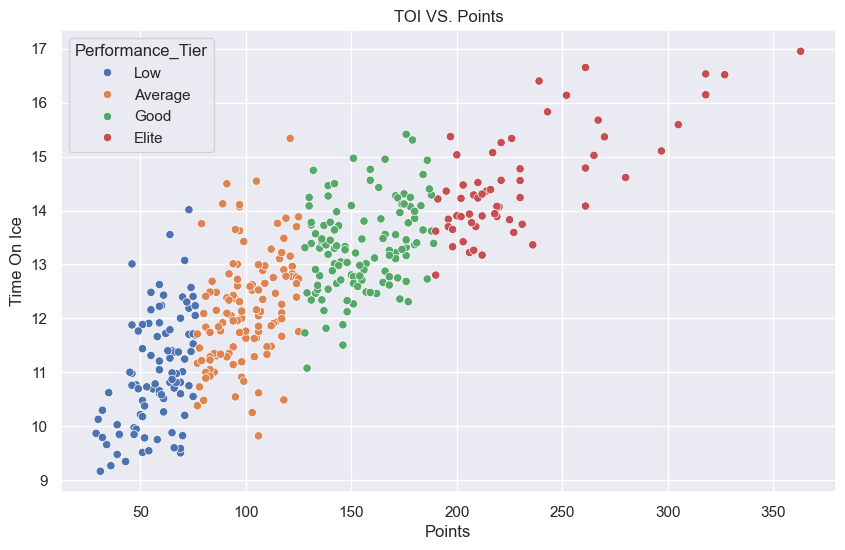

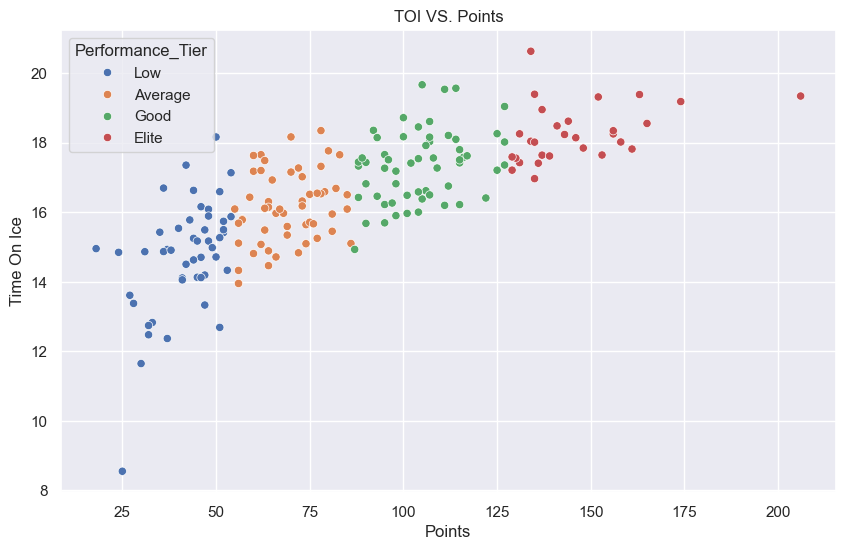

In [20]:



# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Forward, x='Points', y=Forward['icetime'] / Forward['games_played'], hue='Performance_Tier')
plt.title('TOI VS. Points')
plt.ylabel('Time On Ice')

plt.figure(figsize=(10,6))
sns.scatterplot(data=Def, x='Points', y=Def['icetime']/Def['games_played'], hue = 'Performance_Tier')
plt.title('TOI VS. Points')
plt.ylabel('Time On Ice')

Text(0, 0.5, 'Giveaways per 60 minutes')

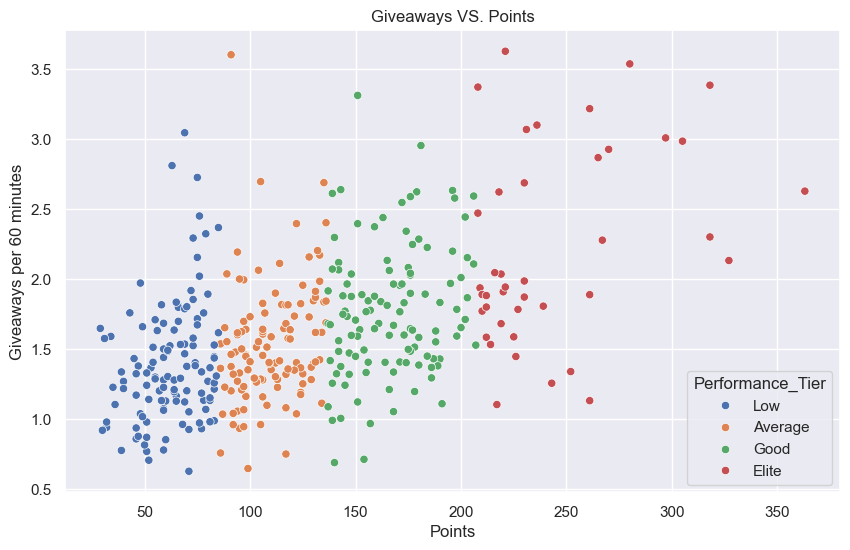

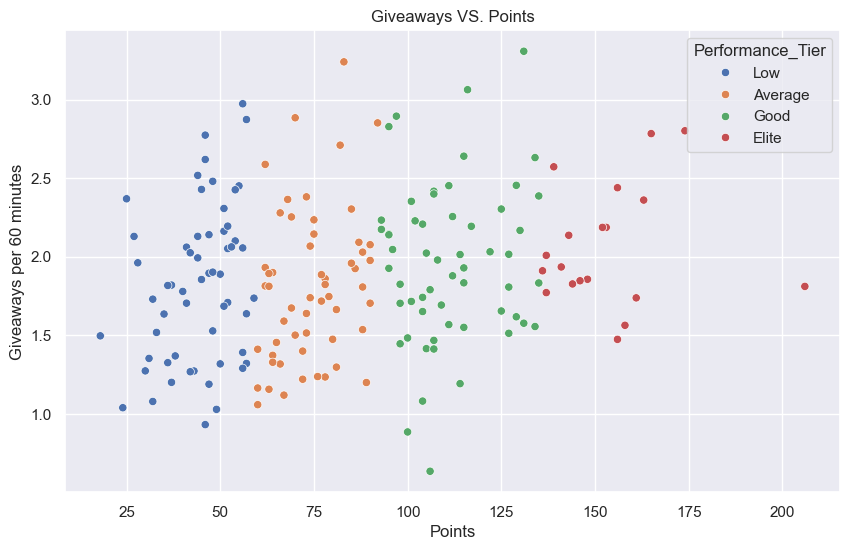

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Forward, x='Points', y=Forward['Giveaways'] / Forward['icetime']*60, hue = 'Performance_Tier')
plt.title('Giveaways VS. Points')
plt.ylabel('Giveaways per 60 minutes')

plt.figure(figsize=(10,6))
sns.scatterplot(data=Def, x='Points', y=Def['Giveaways']/Def['icetime']*60, hue = 'Performance_Tier')
plt.title('Giveaways VS. Points')
plt.ylabel('Giveaways per 60 minutes')

In [11]:
regression_data = Forward[['Points', 'icetime', 'Shots on goal', 'Shot attempts', 'Primary_assists', 'Secondary_assists', 'Goals', 'Saved unblocked shot attempts', 'PM', 'Takeaways', 'Giveaways', 'Low danger shots', 'Medium danger shots', 'High danger shots']]
regression_data.corr()

,Points,icetime,Shots on goal,Shot attempts,Primary_assists,Secondary_assists,Goals,Saved unblocked shot attempts,PM,Takeaways,Giveaways,Low danger shots,Medium danger shots,High danger shots
Points,1.000000,0.897478,0.858847,0.862750,0.949086,0.894157,0.933658,0.844107,0.199915,0.838182,0.836422,0.818203,0.836362,0.692746
icetime,0.897478,1.000000,0.846811,0.842378,0.825537,0.849537,0.837508,0.841149,0.288392,0.803957,0.773434,0.796980,0.835228,0.742830
Shots on goal,0.858847,0.846811,1.000000,0.990552,0.743738,0.695137,0.904301,0.994345,0.275647,0.711770,0.706616,0.974135,0.896074,0.775363
Shot attempts,0.862750,0.842378,0.990552,1.000000,0.751457,0.693537,0.906924,0.994395,0.280972,0.713415,0.723193,0.981115,0.884604,0.751748
Primary_assists,0.949086,0.825537,0.743738,0.751457,1.000000,0.841126,0.799822,0.731998,0.165144,0.824528,0.837185,0.719984,0.704011,0.561282
Secondary_assists,0.894157,0.849537,0.695137,0.693537,0.841126,1.000000,0.738207,0.682068,0.190721,0.766420,0.757367,0.647597,0.697677,0.594566
Goals,0.933658,0.837508,0.904301,0.906924,0.799822,0.738207,1.000000,0.888439,0.202825,0.747457,0.736653,0.858665,0.888332,0.747023
Saved unblocked shot attempts,0.844107,0.841149,0.994345,0.994395,0.731998,0.682068,0.888439,1.000000,0.293457,0.703414,0.704174,0.980595,0.893268,0.771698
PM,0.199915,0.288392,0.275647,0.280972,0.165144,0.190721,0.202825,0.293457,1.000000,0.144872,0.267950,0.253106,0.306935,0.332198
Takeaways,0.838182,0.803957,0.711770,0.713415,0.824528,0.766420,0.747457,0.703414,0.144872,1.000000,0.775212,0.676596,0.695985,0.592148


In [12]:
dependent_vars = regression_data['Points']
independent_vars = Forward[['icetime', 'Shots on goal', 'Shot attempts', 'Primary_assists', 'Secondary_assists', 'Goals', 'Saved unblocked shot attempts', 'PM', 'Takeaways', 'Giveaways', 'Low danger shots', 'Medium danger shots', 'High danger shots']]

lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit() #fit the model to the data using the fit method
print(reg_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Points   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.732e+30
Date:                Thu, 05 Sep 2024   Prob (F-statistic):                        0.00
Time:                        13:10:21   Log-Likelihood:                          10769.
No. Observations:                 393   AIC:                                 -2.151e+04
Df Residuals:                     381   BIC:                                 -2.147e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [13]:
dependent_vars = regression_data['Points']
independent_vars = Forward[['icetime', 'Shots on goal', 'Shot attempts', 'PM', 'Takeaways', 'Giveaways']]

lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit() #fit the model to the data using the fit method
print(reg_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Points   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2799.
Date:                Thu, 05 Sep 2024   Prob (F-statistic):                   3.09e-315
Time:                        13:10:22   Log-Likelihood:                         -1754.3
No. Observations:                 393   AIC:                                      3521.
Df Residuals:                     387   BIC:                                      3544.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------